# Ordinary Differential Equations (ODEs)

In [2]:
import fractions

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, linalg, optimize

## Introduction and useful concepts

Most physical systems change over time. 
From an orbiting satellite to a cooling cup of coffee, from a swinging pendulum to a decaying radioisotope, from reacting chemical species to competing biological species, a state of flux is the norm. 

One of the motivating problems for the invention of differential calculus was to characterize the motion of celestial bodies and earthly projectiles so that their future locations could be predicted.
Differential equations provide a mathematical language for describing continuous change. 

Beginning with Newton’s laws of motion, most of the fundamental laws of science are expressed as differential equations.

Suppose that the state of a system at any given time $t$ is described by some vector function $\mathbf{y}(t)$,

For example, the components of $\mathbf{y}(t)$ might represent the spatial coordinates of a projectile or concentrations of various chemical species. 

A **differential equation** prescribes a relationship between this unknown state function $\mathbf{y}(t)$ and one or more of its derivatives with respect to $t$ that must hold at any given time. 

In solving a differential equation, the objective is to determine a differentiable function $\mathbf{y}(t)$ that satisfies the prescribed relationship.

Finding such a solution of the differential equation is important because it will enable us to predict the future evolution of the system over time.

> **Example**
>
> *Newton’s Second Law of Motion* states that force equals mass times acceleration ($F = ma$)
>
> This differential equation relates the state of an object, in this case its position in space, to the second derivative of that state function. 
> In one dimension, the differential equation looks like this:
>
> $$F(t,y(t),dy(t)/dt)=m\frac{d^2y}{dt^2}$$
> 
> where the force $F$ in general depends on the time $t$, the position $y(t)$, and the velocity $dy(t)/dt$, and the acceleration is the second derivative of the position $\frac{d^2y}{dt^2}$.
> If $F$ is the gravitational force on an object (near Earth’s surface), then $F = −mg$, where $g$ is the standard gravity.
> The solution to the differential equation is then given by
>
> $$y(t)=-\frac{1}{2}gt^2+c_1t+c_2$$
>
> where $c_1$ and $c_2$ are constants that depend on the initial position and velocity of the object. 
> This solution function describes the trajectory of the object over time under the force of gravity.

When there is only one independent variable, such as time, then all derivatives of the dependent variables are with respect to that independent variable, and we have an **ordinary differential equation, or ODE**. 

In the PDE notebook we will consider systems with more than one independent variable, so that partial derivatives are required and we have a **partial differential equation, or PDE**.

**Notation**: To make ODEs less cumbersome to express, we will use the notation $\mathbf{y}'(t) = d\mathbf{y}(t)/dt$ to indicate the
first derivative with respect to the (only) independent variable $t$, and we will often suppress the explicit dependence on $t$, for example writing $\mathbf{y}' = d\mathbf{y}/dt$, with the dependence
on t understood. 

> **Example**
>
> With these conventions Newton’s Second Law can be written $F = m y''$.

The highest-order derivative appearing in an ODE determines the **order** of the ODE. 

> **Example**
>
> Newton’s Second Law is a second-order ODE.


The most general $k$th order ODE has the **implicit** form

$$\mathbf{f}(t,\mathbf{y},\mathbf{y}',\ldots,\mathbf{y}^{(k)})=\mathbf{0}$$

where $\mathbf{f}$ is a known function and y(t) is to be determined. 

A $k$th order ODE is said to be **explicit** if it can be written in the form

$$\mathbf{y}^{(k)}(t)= \mathbf{f}(t,\mathbf{y},\mathbf{y}',\ldots,\mathbf{y}^{(k-1)}) $$

Many ODEs arise naturally in this form, and many others can be transformed into it.

> **Example**
> 
> Newton’s Second Law is technically implicit, but it can be made explicit by dividing both sides by the mass $m$, so that it becomes 
>
> $$y''=F/m$$ 
>

We will only consider first-order ODEs. 
This is not a real restriction because a higher-order ODE can always be transformed into an equivalent first-order system as follows. 

For an explicit $k$th order ODE of the form just given, define the $k$ new unknowns

- $u_1(t) = y(t)$, 
- $u_2(t) = y'(t)$
- $\cdots$
- $u_k(t) = y^{(k−1)}(t)$, 

so that the original $k$th order equation becomes a system of $k$ first-order equations:

$$
\begin{bmatrix}
\mathbf{u}'_1 \\
\mathbf{u}'_2 \\
\vdots \\
\mathbf{u}'_{k-1} \\
\mathbf{u}'_k
\end{bmatrix} = \begin{bmatrix}
\mathbf{u}_2 \\
\mathbf{u}_3 \\
\vdots \\
\mathbf{u}_k \\
\mathbf{f}(t,\mathbf{u}_1,\mathbf{u}_2,\cdots,\mathbf{u}_k)
\end{bmatrix} = \mathbf{g}(t,\mathbf{u})
$$

> **Example**
>
> Again, Newton’s Second Law, which is of second order, is a good example. 
> 
> If we define the new unknowns:
> 
> - $u_1(t) = y(t)$
> - $u_2(t) = y'(t)$
>
> ,then Newton’s Second Law becomes a system of two first-order equations
>
> $$
\begin{bmatrix}u'_1 \\
u'_2\end{bmatrix}=\begin{bmatrix}
u_2 \\ F/m
\end{bmatrix}
$$
>
> Which looks a lot more familiar if we introduce the velocity $v$ instead of $u_2$ and the position $x$ instead of $u_1$
>
> $$
\begin{bmatrix}x' \\
v'
\end{bmatrix}=\begin{bmatrix}
v \\
F/m
\end{bmatrix}
$$

An ODE $\mathbf{y}'= \mathbf{f}(t, \mathbf{y})$ does not by itself determine a unique solution function because only the slopes $\mathbf{y}'(t)$ of the solution components are prescribed by the ODE for any value of $t$, not the solution value $\mathbf{y}(t)$ itself, so there is usually an infinite family of functions that satisfy the ODE. 

To single out a particular solution, we must specify the value of the solution function, denoted by $\mathbf{y}_0$, for some value of $t$, denoted by $t_0$.
Thus, part of the given problem data is the requirement that $\mathbf{y}(t_0) = \mathbf{y}_0$.

Under reasonable assumptions, this additional requirement determines a unique solution to the given ODE. 
Because the independent variable $t$ often represents time, we think of $t_0$ as the initial time and $\mathbf{y}_0$ as the initial value of the state vector. 

Accordingly, the requirement that $\mathbf{y}(t_0) = \mathbf{y}_0$ is called an **initial condition**, and an ODE together with an initial condition is called an **initial value problem**, or **IVP**.


Starting from its initial state $\mathbf{y}_0$ at time $t_0$ , the ODE governs the dynamic evolution of the system for $t \geq t_0$ , and we seek a function $\mathbf{y}(t)$ that satisfies the initial condition and describes the state of the system as a function of time.

---

If we integrate the ODE $\mathbf{y}' = \mathbf{f}(t, \mathbf{y})$ and use the initial condition $\mathbf{y}(t_0) = \mathbf{y}_0$,
we obtain the integral equation

$$\mathbf{y}(t)=\mathbf{y}_0+\int_{t_0}^t\mathbf{f}(s)ds$$

which explains, why solving an ODE, by whatever means, is often referred to as **integrating the ODE**.


## Numerically solving ODE's

Our approach to solving differential equations numerically will be based on discretization:

We will replace differential equations by algebraic equations whose solutions approximate those of the given differential equations. 
For an initial value problem, approximate solution values are generated step by step in discrete increments across the interval in which the solution is sought. 
For this reason, numerical methods for solving ODEs are sometimes called discrete variable methods

A numerical solution of an IVP is obtained by starting at time $t_0$ with the given initial value $\mathbf{y}_0$ and attempting to track the solution trajectory dictated by the ODE. 

We can determine the initial slope $\mathbf{y}'_0$ of each component of the solution by evaluating $\mathbf{f}$ at the given initial data, i.e., $\mathbf{y}'_0 = \mathbf{f}(t_0,\mathbf{y}_0)$.
We use this information to predict the value $\mathbf{y}_1$ of the solution at some future time $t_1 = t_0 + h_0$ for some suitably chosen increment $h_0$.
We can then evaluate $\mathbf{y}'_1 = \mathbf{f}(t_1 , \mathbf{y}_1)$ and repeat the process to take another step forward, and so on until we reach the final desired time.

### Euler forward method

The simplest example of this approach is **Euler’s method**, for which the approximate solution at time $t_{k+1} = t_k + h_k$ is given by 

$$\mathbf{y}_{k+1} = \mathbf{y}_k + h_k \mathbf{f}(t_k, \mathbf{y}_k)$$

Euler’s method is an example of a **single-step method** in which the next approximate solution value depends only on the current values of $t_k$ , $\mathbf{y}_k$, and $h_k$.

For reasons we will soon see, Euler’s method is generally inefficient, so it is seldom used in practice, but it is of fundamental importance in understanding the basic concepts and principles in solving differential equations numerically

Euler's method can be derived in several ways:

- **Finite diffference appoximation**

If we replace the derivative $\mathbf{y}'(t)$ in the ODE $\mathbf{y}' = \mathbf{f}(t, \mathbf{y})$ by a first-order forward difference approximation (see notebook on integration and differentiation), we obtain an algebraic equation

$$
\frac{\mathbf{y}_{k+1}-\mathbf{y}_k}{h_k}=\mathbf{f}(t_k,\mathbf{y}_k)
$$

which gives Euler’s method when solved for $y_{k+1}$.

- **Taylor Series** 

Consider the Taylor series

$$
\mathbf{y}(t + h) = \mathbf{y}(t) + h \mathbf{y}'(t) + 1/2 h^2 \mathbf{y}''(t) + \cdots
$$

Euler’s method results from taking $t = t_k$ , $h = h_k$ , $\mathbf{y}'(t_k ) = \mathbf{f}(t_k , \mathbf{y}_k )$, and dropping terms of second and higher order.

This is actually a very convenient and powerful method to construct solvers and we'll see a more advanced example further below when we construct our very own Runge-Kutta solver.

> **Example**
>
> Consider the ODE $y'=y$ with initial value $y_0$ at $t_0=0$
>
> This simple problem is easily solved analytically, but for illustration let us apply Euler’s method to solve it numerically.
> For simplicity, we will use a fixed step size $h$. We first advance the solution from time $t_0 = 0$ to time $t_1 = t_0 + h$
>
> $$y_1=y_0+hy'_0=y_0+hy_0= (1+h)y_0$$
>
> Note that the approximate solution value $y_1$ we obtain at $t_1$ is not exact (i.e., $y_1 \neq y(t_1 ))$.
> 
> For example, if $t_0 = 0$, $y_0 = 1$, and $h = 0.5$, then $y_1 = 1.5$, whereas the exact solution for this initial value is $y(0.5) = \exp(0.5) \approx 1.649$.
>
> Thus, the value $y_1$ lies on a different solution of the ODE from the one on which we started, as illustrated below.

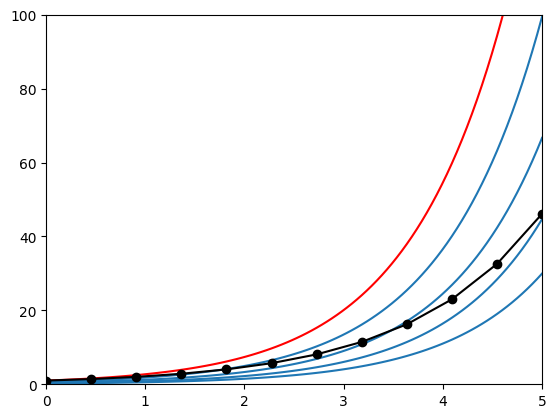

In [3]:
def demo_unstable_solution():
    """Illustrate the (in)stability of the solution of the ODE y'=y with y(0)=1
    when integrated with a sufficiently small step size h=0.5.
    """

    def exact(x, c):
        return np.exp(x - c)

    x = np.linspace(0, 5, 100)
    steps: int = 12
    t = np.linspace(0, 5, steps)
    h = (t[0] + t[-1]) / steps
    y = np.zeros(steps)
    y[0] = 1
    for i in np.arange(1, steps):
        y[i] = y[i - 1] + h * y[i - 1]

    plt.close("unstable")
    fig, ax = plt.subplots(num="unstable")
    for i in np.linspace(0, 1.6, 5):
        ax.plot(
            x, exact(x, i), "-", c="#1f77b4" if i != 0 else "r", label="y(O) = 1"
        )

    ax.plot(t, y, "o-", c="k")
    ax.axis([0, 5, 0, 100])


demo_unstable_solution()

We can continue to take additional steps, generating a table of discrete values of the approximate solution over whatever interval we desire. 
As we do so, we will hop from one solution to another at each step. 
The solutions of this ODE are unstable, so the errors we make at each step are amplified with time as a result of the divergence of the solutions, as could be seen in the previous figure

For an equation with stable solutions, on the other hand, the errors in the numerical solution do not grow, and for an equation with asymptotically stable solutions, such as $y' = -y$, the errors diminish with time, as shown in the next figure.

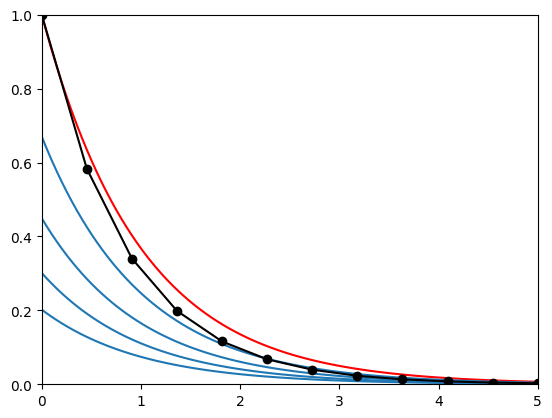

In [4]:
def demo_stable_solution():
    """Illustrate the stability of the solution of the ODE y'=-y with y(0)=1
    when integrated with a sufficiently small step size h=0.5
    """

    def exact(x, c):
        return np.exp(-x - c)

    x = np.linspace(0, 5, 100)
    steps: int = 12
    t = np.linspace(0, 5, steps)
    h = (t[0] + t[-1]) / steps
    y = np.zeros(steps)
    y[0] = 1
    for i in np.arange(1, steps):
        y[i] = y[i - 1] - h * y[i - 1]

    plt.close("stable")
    fig, ax = plt.subplots(num="stable")
    for i in np.linspace(0, 1.6, 5):
        ax.plot(
            x, exact(x, i), "-", c="#1f77b4" if i != 0 else "r", label="y(O) = 1"
        )

    ax.plot(t, y, "o-", c="k")
    ax.axis([0, 5, 0, 1])


demo_stable_solution()

### Accuracy and Stability

**Rounding error and truncation error**

Like other methods that approximate derivatives by finite differences, a numerical procedure for solving an ODE suffers from two distinct sources of error:

- **Rounding error** , which is due to the finite precision of floating-point arithmetic
- **Truncation error** (or **discretization error**), which is due to the method used, and which would remain, even if all arithmetic were performed exactly

Although they arise from different sources, these two types of errors are not independent of each other.
For example, the truncation error can usually be reduced by using a smaller step size $h$, but doing so may incur greater rounding error. 

In most practical situations, truncation error is the dominant factor in determining the accuracy of numerical solutions of ODEs, so we will ignore rounding error in this context.

**Local and global error**

The truncation error at the $k$th step comes in two distinct but related flavors:

- **Global error** is the cumulative overall error

$$\mathbf{e}_k=\mathbf{y}_k-\mathbf{y}(t_k)$$

where $\mathbf{y}_k$ is the computed solution at $t_k$ and $\mathbf{y}(t)$ is the true solution of the ODE passing through the initial point ($t_0$ ,$\mathbf{y}_0$).

- **Local error** is the error made in one step of the numerical method,

$$\boldsymbol{\ell}_k=\mathbf{y}_k-\mathbf{u}_{k-1}(t_k)$$

where $\mathbf{u}_{k-1}$ is the solution of the ODE passing through the previous point ($t_{k−1}$ , $\mathbf{y}_{k−1}$ ).

The global error is obviously of primary interest, but only the local error can be readily estimated and controlled, so we need to understand the relationship between the two.

In a bank savings account earning compound interest, early deposits have more time to grow than later ones, and this growth means that the total value of the account is not simply the sum of the individual deposits. 
Similarly, the global error of an approximate solution to an ODE at a given step reflects not only the local error at that step, but also the compounded effects of the local errors at all previous steps.
Thus, the global error is not simply the sum of the local errors. 
If the solutions of the ODE are diverging, then the local errors at each step are magnified over time, so that the global error is greater than the sum of the local errors.
If the solutions of the ODE are converging, on the other hand, then the global error may
be less than the sum of the local errors.
In order to assess the effectiveness of a numerical method, we need to characterize both its local error (accuracy) and the compounding effects over multiple steps (stability).

**Accuracy**

The accuracy of a numerical method is said to be of order $p$ if

$$\boldsymbol{\ell}_k=\mathcal{O}(h_k^{p+1})$$

The motivation for this definition, with the order of accuracy one less than the exponent of the step size in the local error, is that if the local error is $\mathcal{O}(h_k^{p+1})$, then the local error per unit step, $\boldsymbol{\ell}_k /h_k$, is $\mathcal{O}(h_k^p)$, and it can be shown that under reasonable conditions the global error $\mathbf{e}_k$ is $\mathcal{O}(h^p)$, where $h$ is the average step size.


**Stability** 

The concept of stability of a numerical method for an ODE is analogous to the stability of solutions to an ODE:

Recall that a solution to an ODE is stable if perturbations of the solution do not diverge away from it over time. Similarly, a numerical method is said to be stable if small perturbations do not cause the resulting numerical solution to diverge away without bound. 

Such divergence of numerical solutions could be caused by instability of the solution to the ODE, but as we will see, it can also be caused by the numerical method itself, even when the solutions to the ODE are stable. 

To focus specifically on instability due to the numerical method, an alternate definition of stability requires that the numerical solution at any arbitrary but fixed time $t$ remains bounded as $h \rightarrow 0$. 
The two definitions are effectively equivalent, however, as either definition prohibits excessive growth as the number of steps becomes arbitrarily large

> **example**
> 
> Let us first examine stability and accuracy in the simple context of Euler’s method applied to the scalar ODE 
>
> $$y'= \lambda y$$
>
> where $\lambda$ is a (possibly complex) constant. 
>
> With initial condition $y(0) = y_0$ , the exact solution to the IVP is given by 
>
> $$y(t) = y_0 e^{\lambda t}$$
>
> Applying Euler’s method to this ODE using a fixed step size $h$, we have the recurrence
>
> $$y_{k+1} = y_k + h \lambda y_k = (1 + h \lambda) y_k$$
>
> which implies that
>
> $$y_k = (1 + h\lambda)^k y_0$$
>
> The quantity $1 + h \lambda$ is called the **growth factor**.
>
> - If Re$(\lambda) < 0$, then the exact solution of the ODE decays to zero as t increases, as will the successive computed solution values if $\|1+h \lambda\| < 1$. 
>
> - If $\|1+h\lambda\| > 1$, on the other hand, then the computed solution values grow without bound regardless of the sign of Re$(\lambda)$, which means that Euler’s method can be unstable even when the exact solution is stable.
>
> In order for Euler’s method to be stable, the step size h must satisfy the inequality
>
> $$\|1 + h \lambda\| \leq 1$$
>
> which says that $h \lambda$ must lie inside a circle in the complex plane of radius 1 centered at -1. 
>
> If $\lambda$ is real, then $h\lambda$ must lie in the interval $(-2, 0)$, which means that for $\lambda < 0$, we must have $h \leq −2/\lambda$ for Euler’s method to be stable. 
>
> We also note that the growth factor 1 + hλ agrees with the series expansion
>
> $$e^{h\lambda}=1+h\lambda+\frac{(h\lambda)^2}{2}+\frac{(h\lambda)^3}{6}+\cdots$$
>
> through terms of first order in h, so the accuracy of Euler’s method is of first order.
>
> This stability criterion is illustrated in the demo below:

In [5]:
def demo_euler_stability():
    """This demo illustrates the stability of the Euler forward method when
    integrating y'=-y with  y(0)=10 from 0 to 10000 as function of the step
    size taken in this interval.

    We expect the method to be stable if 0<h<2,
    and print the error for h=1.99,2.00 and 2.01.
    """

    def int(h):
        y = 10.0
        tmax = 10000.0
        for _t in np.arange(0.0, tmax + h, h):
            y = y - h * y
        return np.abs(y - 10 * np.exp(-tmax))

    print("h\t error")
    for h in np.arange(1.99, 2.011, 0.01):
        print(h, "\t", int(h))


demo_euler_stability()

h	 error
1.99 	 1.1432027010231947e-21
2.0 	 10.0
2.01 	 3.217194489886198e+22


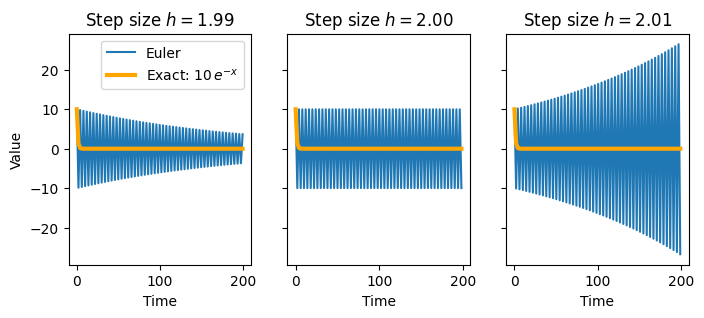

In [6]:
def plot_euler_stability():
    """Plot the results of the Euler method for different step sizes
    and compare with the exact solution.

    This function creates a 1x3 grid of subplots to display the numerical
    approximation and exact solution for each step size(h) using the Euler
    forward method.
    """
    plt.close("euler_stab")
    fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True, num="euler_stab")

    h_values = np.arange(1.99, 2.011, 0.01)

    for idx, h in enumerate(h_values):
        y = 10
        y_list = [y]
        t_values = np.arange(0, 200, h)
        for _t in t_values:
            y -= h * y
            y_list.append(y)

        axs[idx].plot(t_values, y_list[:-1], label="Euler")
        axs[idx].plot(
            t_values,
            10 * np.exp(-t_values),
            label=r"Exact: $10\, e^{-x}$",
            linestyle="-",
            color="orange",
            linewidth=3,
        )
        axs[idx].set_title(f"Step size $h = {h:.2f}$")
        axs[idx].set_xlabel("Time")
        if idx == 0:
            axs[idx].legend()
            axs[idx].set_ylabel("Value")


plot_euler_stability()

**General case**

A more general analysis produces the same stability and accuracy results as we obtained using the simple scalar test equation.
Especially for more complicated numerical methods, this simple scalar test ODE is far easier to work with than a general ODE, and it produces essentially the same stability results if we equate the complex coefficient $\lambda$ with the eigenvalues of the Jacobian matrix $\mathbf{J}_f$ of $\mathbf{f}$ with respect to $\mathbf{y}$ at a given point.

### Implicit methods (Euler backward method)

Euler’s method is an **explicit method** in that it uses only information at time $t_k$ to
advance the solution to time $t_{k+1}$ . 

Methods which also use information at time $t_{k+1}$ are called **implicit methods**.

The simplest example is the **Euler backward** method

$$\mathbf{y}_{k+1}=\mathbf{y}_{k}+h_k\mathbf{f}(t_{k+1},\mathbf{y}_{k+1})$$

> **Derivation**
>
> This method can again be derived using a Taylor expansion:
>
> Consider the Taylor series
>
> $$\mathbf{y}(t - h) = \mathbf{y}(t) - h \mathbf{y}'(t) + \frac{1}{2}h^2 \mathbf{y}''(t) + \cdots$$
>
> By taking $t = t_{k+1}$ , $h = h_k$ , $\mathbf{y}'(t_{k+1} ) = \mathbf{f}(t_{k+1} , \mathbf{y}_{k+1} )$, and dropping terms of second and higher order, we find:
>
> $$\mathbf{y}(t_{k+1}-h) = \mathbf{y}(t_{k+1}) - h_k \mathbf{f}(t_{k+1},\mathbf{y}_{k+1})$$
>
> Because $t_{k+1}-h=t_k$, and by isolating $\mathbf{y}(t_{k+1})$, this is Euler's backward method.

The backward Euler method is implicit because we must evaluate $f$ with the argument $y_{k+1}$ *before we know its value*.
This is not a problem because this statement simply means that a value for $y_{k+1}$ that satisfies the preceding equation must be determined, and if $f$ is a nonlinear function of $y$, as is often the case, then an iterative solution method, as seen in the nonlinear equations notebook, must be used. 

A good starting guess for the iteration can be obtained from an explicit method, such as Euler’s method, or from the solution at the previous time step.

> **Example**
>
> Consider the nonlinear scalar ODE $y' = −y^3$ with initial condition $y(0) = 1$.
>
> Using the backward Euler method with a step size of $h = 0.5$, we obtain the equation
>
> $$y_1=y_0+hf(t_1,y_1)=1-0.5y_1^3$$
> 
> for the solution value at the next step. 
>
> You can solve this nonlinear equation using fixed-point-iteration with an initial guess given by the current value of $y_0=1$, or using an initial guess given by the solution of the Euler forward method, as is done below.
>
> $$y_1=y_0-0.5y_0^3=0.5$$

In [7]:
optimize.fixed_point((lambda y: 1.0 - 0.5 * y**3), 0.5, method="iteration")

np.float64(0.7709170003647279)

> The analytical solution to this problem is
>
> $$y=\frac{1}{\sqrt{2x+1}}$$
>
> resulting in a value of $y(0.5)=0.7071067811865475$


In [8]:
def analytical(x):
    return 1.0 / np.sqrt(2.0 * x + 1.0)


analytical(0.5)

np.float64(0.7071067811865475)

> Note that both the Euler forward (0.5) and Euler backward (0.77) methods result in an estimate that is quite far from the real value, given the large step size of 0.5.
>
> Repeating this procedure with a smaller step size results in better estimates.

In [9]:
def demo_stepsize(N):
    """Function that show the accuracy of the Euler forward
    and Euler backward functions to numerically integrate
    y'=-y^3 with y(0)=1 from 0 to 0.5
    as function of the step size taken in this interval

    Parameters
    ----------
        N
            A measure for the number of steps taken between 0 and 1.
            N=1 means that h=0.5,
            N=2 that h=0.25
            and so on.
    """

    # analytical solution
    def func(x):
        return 1.0 / np.sqrt(2.0 * x + 1.0)

    # check with euler forward with smaller steps sizes of 0.5/N
    y = 1
    for _ in np.arange(N):
        y = y - 0.5 / N * y**3.0

    print("Euler forward result\n----------------------------")
    print("Step size, result, error")
    print(0.5 / N, y, np.abs(y - func(0.5)))

    # same for euler backward

    y = 1
    for _ in np.arange(N):
        yold = y
        y = optimize.fixed_point(
            (lambda ynew, yold=yold: yold - 0.5 / N * ynew**3),
            yold,
            method="iteration",
        )

    print("\nEuler backward result\n----------------------------")
    print("Step size, result, error")
    print(0.5 / N, y, np.abs(y - func(0.5)))


demo_stepsize(10)

Euler forward result
----------------------------
Step size, result, error
0.05 0.6974455049940009 0.00966127619254653

Euler backward result
----------------------------
Step size, result, error
0.05 0.7158805208572476 0.008773739670700165


**Stability of the Euler backward method**

Given the extra trouble and computation in using an implicit method, one might wonder why we would bother. 
The answer is that implicit methods generally have a significantly larger stability region than comparable  explicit methods. 
To determine the stability and accuracy of the backward Euler method, we apply it to the scalar test ODE $y'=\lambda y$, obtaining

$$y_{k+1}=y_k+h\lambda y_{k+1}$$

or

$$(1-h\lambda)y_{k+1}=y_k$$

so that

$$y_k=\left(\frac{1}{1-h\lambda}\right)^k y_0$$

Thus, for the backward Euler method to be stable we must have

$$\left|\frac{1}{1-h\lambda}\right|\leq 1$$

which holds for any $h > 0$ when Re$(\lambda) < 0$.
Thus, the stability region for the backward Euler method includes the entire left half of the complex plane, or the interval $(-\infty, 0)$ if $\lambda$ is real, and there is no stability restriction on the step size
when computing a stable solution. The growth factor

$$\frac{1}{1-h\lambda}=1+h\lambda+(h\lambda)^2+\cdots$$

agrees with the expansion for $e^{h\lambda}$ through terms of order $h$, so the backward Euler method is first-order accurate.

For any ODE, the stability region for the backward Euler method includes the entire left half of the complex plane, and hence for computing a stable solution, the method is stable for any positive step size. 
Such a method is said to be **unconditionally stable**.
The great virtue of an unconditionally stable method is that the desired local accuracy places the only constraint on our choice of step size.
Thus, we may be able to take much larger steps than for an explicit method of comparable order and attain much higher overall efficiency despite requiring more computation per step because of having to solve an equation at each step of the implicit method.

However, not all implicit methods have this property. 
Implicit methods generally have larger stability regions than explicit methods, but the allowable step size is
not always unlimited. 
Implicitness alone is not sufficient to guarantee stability.

###  Stiffness

**Stiffness** is a concept that can be defined a number of ways. For us, the most meaningful way is its correspondence to the physics behind the problems we are investigating.

If a system contains dynamics on very different timescales, like a slow relaxation towards a certain equilibrium, but with rapid oscillations around it, or with very strongly damped transients, then it is considered stiff.

Mathematically, a stable ODE $\mathbf{y}_0 = \mathbf{f}(t, \mathbf{y})$ is stiff if its Jacobian
matrix $\mathbf{J}_f$ has eigenvalues that differ greatly in magnitude. 
There may be eigenvalues with relatively large negative real parts (corresponding to strongly damped components of the solution) or relatively large imaginary parts (corresponding to rapidly oscillating components of the solution).

Some numerical methods are very inefficient for stiff equations because the rapidly varying component of the solution forces very small step sizes to be used to maintain stability.
Since the stability restriction depends on the rapidly varying component of the solution, whereas the accuracy restriction depends on the slowly varying component, the step size may be much more severely restricted by stability than by the required accuracy. 

Euler’s forward method, for example, is extremely inefficient for solving a stiff equation because of its small stability region. The unconditional stability of the implicit backward Euler method, on the other hand, makes it suitable for stiff problems. 

Stiff ODEs need not be difficult to solve numerically, provided a suitable method, generally implicit, is chosen.
This is illustrated with an example below:

> **Example**
>
> Consider the stiff ODE
>
> $$y'=-100y+100t+101$$
> 
> with $y(0)=1$.
> 
> The analytical solution to this equation (in general) is $1+t+ce^{-100t}$ (i.e. with a very strongly damped component). For our specific initial value, $c=0$, so the solution becomes the linear equation $y(t)=1+t$, which in principle would be very well suited to solve with Euler's forward method.
>
> However, to illustrate the effect of truncation or rounding errors,
> let us perturb the initial value slightly. 
>
> With a step size h = 0.1, the first few steps for the given initial values are given for the analytical solution in the following table
>
> | t    | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 |
> |------|-----|-----|-----|-----|-----|-----|
> | y(t) | 1   | 1.1 | 1.2 | 1.3 | 1.4 | 1.5 |
>
>
> Let's compare this with the numerical solutions obtained with the Euler forward and backward methods.

     t,   analytical, forward, backward
[[  0.      1.      0.99    0.   ]
 [  0.1     1.1     1.19    1.009]
 [  0.2     1.2     0.39    1.192]
 [  0.3     1.3     8.59    1.299]
 [  0.4     1.4   -64.21    1.4  ]
 [  0.5     1.5   591.99    1.5  ]]


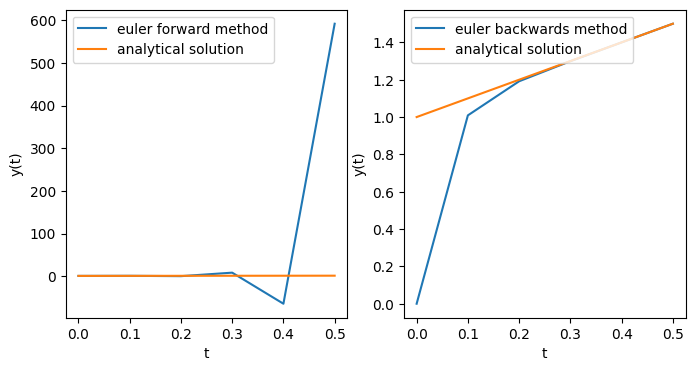

In [10]:
def demo_stiff():
    """Function that show the accuracy of the Euler forward
    and Euler backward functions to numerically integrate
    a very stiff problem

    The output loooks as follows:
    - the first column will contain the time points
    - the second column will contain the analytical results
    - the third column the approximation using euler forward
    - the fourth column the approximation using euler backward
    """

    # define empty array with correct dimension to store the output
    results = np.zeros((6, 4))

    # define 6 timepoints, 0,0.1,...0.5 and the analytical solution
    results[:, 0] = np.arange(0.0, 0.6, 0.1)
    results[:, 1] = results[:, 0] + 1

    # define function y'=-100y+100t+101
    def func(y, t):
        return -100 * y + 100 * t + 101

    # define helper function to print header
    def print_header():
        print("    ", "t,   analytical, forward, backward")

    # define helper function to print results
    def print_results():
        for i in np.arange(6):
            print(results[i, :])

    # euler forward method, starting from slightly perturbed initial value y=0.99
    results[0, 2] = 0.99
    for i in np.arange(1, 6):
        results[i, 2] = results[i - 1, 2] + 0.1 * func(
            results[i - 1, 2], results[i - 1, 0]
        )

    # euler backwards method, starting from very perturbed initial value y=0.
    results[0, 3] = 0.0
    for i in np.arange(1, 6):
        # Because f is linear in y, it's very easy to explicitly write
        # the analytical solution to  y1 = y0 + h*yf(t1,y1),
        # instead of using an iterative method y1 = [y0+h(100t1+101)] / (101*h)
        results[i, 3] = (
            1.0 / 11.0 * (results[i - 1, 3] + 0.1 * (100.0 * results[i, 0] + 101.0))
        )

    print_header()
    with np.printoptions(precision=3, suppress=True):
        print(results)

    plt.close("stiff")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), num="stiff")
    ax1.plot(results[:, 0], results[:, 2], label="euler forward method")
    ax2.plot(results[:, 0], results[:, 3], label="euler backwards method")
    for ax in (ax1, ax2):
        ax.set(xlabel="t", ylabel="y(t)")
        ax.plot(results[:, 0], results[:, 1], label="analytical solution")
        ax.legend(loc="upper left")


demo_stiff()

> As you can see, even a tiny perturbation ruins the solution obtained using the Euler forward solver, whereas even a large perturbation eventually damps out as the result tends toward the correct solution using Euler backward.

### Runge-Kutta methods

We can construct better methods, by not only relying on the first derivative of $y'$, but also taking into account higher order derivatives. Such methods are called **Taylor series methods**. However such methods are only practical if the higher order derivatives of $y$ are known analytically and are practical to calculate. 

**Runge-Kutta methods** are single-step methods that are similar in motivation to Taylor series methods but do not involve explicit computation of higher derivatives. 
Instead, Runge-Kutta methods replace higher derivatives by finite difference approximations based on values of $f$ at points between $t_k$ and $t_{k+1}$.

This requires some bootstrapping to obtain the necessary values of $f$, since we do not know the second argument of $f$ , namely the solution $y(t)$, for $t$ between $t_k$ and $t_{k+1}$.


The best-known Runge-Kutta method is the classical fourth-order scheme

$$\mathbf{y}_{k+1}=\mathbf{y}_k+\frac{h_k}{6}(\mathbf{k}_1+2\mathbf{k}_2+2\mathbf{k}_3+\mathbf{k}_4)$$

with

$$\begin{split}
\mathbf{k}_1 &= \mathbf{f}(t_k,\mathbf{y}_k) \\
\mathbf{k}_2 &= \mathbf{f}(t_k+h_k/2,\mathbf{y}_k+(h_k/2)\mathbf{k}_1) \\
\mathbf{k}_3 &= \mathbf{f}(t_k+h_k/2,\mathbf{y}_k+(h_k/2)\mathbf{k}_2) \\
\mathbf{k}_4 &= \mathbf{f}(t_k+h_k,\mathbf{y}_k+h_k\mathbf{k}_3) \\
\end{split}$$

Runge-Kutta methods have a number of virtues. 
- To proceed to time $t_{k+1}$, they require no history of the solution prior to time $t_k$
     - which makes them self-starting at the beginning of the integration
     - and also makes it easy to change the step size during the integration
- These features also make Runge-Kutta methods relatively easy to program, which accounts in part for their popularity.

#### Butcher tableaus

The notation to describe these solvers quickly becomes quite dense and difficult to read. Butcher invented a method to write down all necessary information to understand and implement a solver in a very elegant way: **Butcher tableaus**.

In general, the approximate solution of the ODE

$$\frac{dy}{dt}=f(t,y)$$

at time $t+h$, given its value $y$ on time $t$, is obtained by taking $s$ intermediate evaluations of $f$ at times $c_i$,

$$k_i=f\left(t+c_ih,y_n+h\sum^s_{j=1}a_{ij}k_j\right)$$

and then adding them to $y_n$ with the correct weights $b_i$:

$$y_{n+1}=y_n+h\sum^s_{i=1}b_ik_i$$

These formulas can compactly be represented by a Butcher tableau as follows:

$$\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\
c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\
\vdots & \vdots & \vdots &\ddots & \vdots \\
c_s & a_{s1}& a_{s2}& \cdots &a_{ss} \\ \hline
& b_1 & b_2 & \cdots & b_s 
\end{array}$$

If the tableau only contains elements below the diagonal, then it corresponds to an **explicit** solver. Otherwise it is an **implicit** solver.

Below, the Butcher tableaus of all solvers mentioned above are given. For the methods which have a lower order solution embedded, the lower order solution is shown as an extra row below the higher order solution. The difference between both solutions approximates the error.

- **Euler Forward**

    $$\begin{array}{c|c}
      0 & \\ \hline
      & 1
    \end{array}$$
 
- **Euler Backward**
 
    $$\begin{array}{c|c}
      1 & 1 \\ \hline
      & 1
    \end{array}$$
 
- **4th order Runke-Kutta solver**

    $$\begin{array}{c|cccc}
    0 &  &  &  &  \\
    \frac{1}{2} & \frac{1}{2} &  &  &  \\
    \frac{1}{2} & 0 & \frac{1}{2} &  &  \\
    1 & 0 & 0 & 1 &  \\ \hline
    & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}$$

#### Example derivation (2nd order Runge-Kutta method)

We are trying to solve the differential equation

$$\frac{dy}{dt} = f(t, y)$$

with second-order accuracy using what will turn out to be Heun's method.

The Butcher tableau for this method looks like:

$$
\begin{array}{c|cc}
0 &  &  \\
c_1 & a_{21} &  \\ \hline
& b_1 & b_2
\end{array}
$$

We'll introduce shortcuts for notational clarity:

- $f(t, y) = f$
- Partial derivatives are written as a subscript:
    - $\frac{\partial f}{\partial t}=f_t$
    - $\frac{\partial f}{\partial y}=f_y$



We use the general form for a second-order Runge-Kutta method:

$$
k_1 = f(t, y_n)
$$

$$
k_2 = f(t + c_1 h, y_n + a_{21} h k_1)
$$

By taking the second-order Taylor expansion for $k_1$ and $k_2$:

$$
k_1 = f(t, y_n) = f
$$

$$
k_2 = f(t + c_1 h, y_n + a_{21} h k_1) = f + c_1 h f_t + a_{21} h f f_y + \frac{c_1^2 h^2}{2} f_{tt} + a_{21}^2 \frac{h^2}{2} f^2 f_{yy} + a_{21} c_1 h^2 f f_{ty}
$$

We now substitute into the general formula for updating \(y\):

$$
y_{n+1} = y_n + h(b_1 k_1 + b_2 k_2)
$$

This becomes:

$$
\begin{split}
    y_{n+1} &= y_n + b_1 h f + b_2 h f + b_2 c_1 h^2 f_t + b_2 a_{21} h^2 f f_y \\
    &\qquad + b_2 \frac{c_1^2 h^3}{2} f_{tt} + b_2 a_{21} c_1 h^3 f f_{ty} + b_2 \frac{a_{21}^2 h^3}{2} f^2 f_{yy}
\end{split}
$$

We can now compare this to the Taylor expansion of $y(t)$ up to second order:

$$
y_{n+1} = y_n + h f + \frac{h^2}{2} (f_t + f_y f)
$$

From this comparison, we obtain the following system of equations to determine the unknowns $b_1$, $b_2$, $c_1$, and $a_{21}$:

$$
\begin{split}
    b_1 + b_2 &= 1 \\
    b_2 c_1 &= \frac{1}{2} \\
    b_2 a_{21} &= \frac{1}{2}
\end{split}
$$

Rewriting these equations:

$$
\begin{split}
    b_1 &= 1 - b_2 \\
    b_2 &= \frac{1}{2 c_1} \\
    a_{21} &= c_1
\end{split}
$$

Finally, by choosing \(c_1 = 1\), we get the **Heun method** with the following Butcher tableau:

$$
\begin{array}{c|cc}
0 &  &  \\
1 & 1 &  \\ \hline
& \frac{1}{2} & \frac{1}{2}
\end{array}
$$

This formulation shows the Heun method, where $ c_1 = 1$, $a_{21} = 1$, and $b_1 = b_2 = \frac{1}{2}$.

#### Example derivation (3rd order Runge-Kutta method)

As another example we will derive our very own explicit third order solver.

We are trying to solve a first order differential equation

$$\frac{dy}{dt}=f(t,y)$$

with third order accuracy.

The Butcher tableau we are trying to fill in looks like this:

$$\begin{array}{c|ccc}
0 &  &  &   \\
a & c &  &   \\
b & d & e &   \\ \hline
& F & G & H
\end{array}$$

As already mentioned previously, the notation quickly becomes very dense. 
Therefore we will introduce some notational shortcuts:

- Whenever we evaluate $f$ at $(t,y)$, we no longer write its argument: $f(t,y)=f$
- Partial derivatives are written as a subscript:
    - $\frac{\partial f}{\partial t}=f_t$
    - $\frac{\partial f}{\partial y}=f_y$


Using

$$k_i=f\left(t+c_ih,y_n+h\sum^s_{j=1}a_{ij}k_j\right)$$

and each time taking the second order Taylor expansion we can find $k_1$,$k_2$ and $k_3$ up to order $h^2$ (after substituting $k_1$ and $k_2$ in $k_2$ and $k_3$ where necessary):

$$\begin{split}
    k_1 &= f(t,y_n)=f \\
    k_2 &= f(t+ah,y_n+hck_1) \\
    &= f+ahf_t+chff_y+a^2\frac{h^2}{2}f_{tt}+ach^2ff_{ty}+c^2\frac{h^2}{2}f^2f_{yy} \\
    k_3 &= f(t+bh,y_n+hdk_1+hek_2) \\
    &= f+bhf_t+dhff_y+ehff_y+aeh^2f_yf_t+ceh^2ff_y^2 \\
    &\qquad +b^2\frac{h^2}{2}f_{tt}+bdh^2ff_{ty}+beh^2ff_{ty}+d^2\frac{h^2}{2}f^2f_{yy} \\
    &\qquad +e^2\frac{h^2}{2}f^2f_{yy}+deh^2f^2f_{yy}
\end{split}$$
 
inserting this in 
 
$$y_{n+1}=y_n+h\sum^s_{i=1}b_ik_i$$
 
gives

$$
\begin{split}
     y_{n+1}&=y_n+Fhf+Ghf+Gah^2f_t+Gch^2ff_y+Ga^2\frac{h^3}{2}f_{tt} \\
     &\qquad +Gach^3f_{ty}+Gc^2\frac{h^3}{2}f^2f_{yy}+Hhf+Hbh^2f_t+Hdh^2ff_y \\
     &\qquad +Heh^2ff_y+Haeh^3f_yf_t+Hceh^3ff_y^2+Hb^2\frac{h^3}{2}f_{tt} \\
     &\qquad +Hbdh^3ff_{ty}+Hbeh^3ff_{ty}+Hd^2\frac{h^3}{2}f^2f_{yy} \\
     &\qquad +He^2\frac{h^3}{2}f^2f_{yy}+Hdeh^3f^2f_{yy},
\end{split}
$$

which we can compare with the Taylor expansion up to order 3:

$$
y_{n+1}=y_n+hf+\frac{h^2}{2}(f_t+f_yf)+\frac{h^3}{6}(f_{tt}+2f_{ty}f+f_tf_y+f^2f_{yy}+f_y^2f)
$$

to find the following set of equations to determine the unknowns $a$ up to $G$:

$$
\begin{split}
    F+G+H &= 1 \\
    aG+bH &= 1/2 \\
    cG+H(d+e) &= 1/2 \\
    Ga^2+Hb^2 &= 1/3 \\
    Gac+Hb(d+e) &= 1/3 \\
    Hea &= 1/6 \\
    Ga^2+H(d+e)^2 &= 1/3 \\
    Hec &= 1/6 \\
\end{split}
$$

When defining $a$ and $b$ ourselves, this can be written as:

$$
\begin{split}
    a &= a \\
    b &= b \\
    c &= a \\
    d &= \frac{b(3a^2-3a+b)}{a(3a-2)} \\
    e &= b-d \\
    F &= \frac{6ab-3a-3b+2}{6ab} \\
    G &= \frac{3b-2}{6a(b-a)} \\
    H &= \frac{3a-2}{6b(a-b)} \\
\end{split}
$$

When choosing $a=1/2$ and $b=1$, we obtain the **third order Runge-Kutta method** 

$$
\begin{array}{c|ccc}
    0 &  &  &   \\
    \frac{1}{2} & \frac{1}{2} &  &   \\
    1 & -1 & 2 &  \\ \hline
    & \frac{1}{6} & \frac{2}{3} & \frac{1}{6}   \\
\end{array}
$$

However, if we would like to find our own solver, we choose any value we like for $a$ and $b$.

#### Adaptive step size

Classical Runge-Kutta methods provide no error estimate on which to base the choice of step size and therefore require a **fixed step**.

When a solver contains not only a solution of order $\mathcal{O}(N)$ but also a solution of $\mathcal{O}(N-1)$, we can use the difference between both solutions as an approximation of the error size $\epsilon$ on the solution. 
This error depends on the size of the time step $h$, and given a certain error tolerance $\tau$, it is possible to suggest a $h$ for the next time step which is a large as possible, while still maintaining the level of accuracy required as follows:

$$h_{\mathrm{optimal}}=h_{\mathrm{current}}\left(\frac{\tau}{\epsilon}\right)^{(1/N)}$$

These solvers can therefore use an **adaptive step size**.

In systems governed by dynamics whose speed changes in time, this can boost the performance of a solver tremendously. Even if the *adaptive step* does not need to adapt itself a lot and remains more or less constant, you have the advantage that your simulation runs at the best possible efficiency, given the required accuracy.

A simple example of such a solver is **Heun's method**.
In this method, the first order accurate solution is found using Euler's forward method

$$\tilde{y}_{n+1}=y_n+hf(t,y_{n})$$

Afterwards, the second order solution is found:

$$y_{n+1}=y_n+\frac{h}{2}\left(\vphantom{\frac{h}{2}}f(t,y_n)+f(t+h,\tilde{y}_{n+1})\right)$$

The difference between both solutions is an estimate of the error.

The butcher tableau looks like this:

 
$$
\begin{array}{c|cc}
    0 &  &  \\
    1 & 1 &  \\ \hline
     & \frac{1}{2} & \frac{1}{2} \\
     & 1 & 0
\end{array}
$$

Probably the most used embedded pair method was developed by Dormand and Prince. This is a 5th order accurate solver with a 4th order embedded error estimate.
This solver is the default solver in `scipy` and in matlab.

Its butcher tableau is given here

- **Dormand-Prince method**

$$
\begin{array}{c|ccccccc}
0 &  &  &  &  &  &  &  \\
\frac{1}{5} & \frac{1}{5} &  &  &  &  &  &  \\
\frac{3}{10} & \frac{3}{40} & \frac{9}{40} &  &  &  &  &  \\
\frac{4}{5} & \frac{44}{45} & -\frac{56}{15} & \frac{32}{9} &  &  &  &  \\
\frac{8}{9} & \frac{19372}{6561} & -\frac{25360}{2187} & \frac{64448}{6561} & -\frac{212}{729} &  &  &  \\
1 & \frac{9017}{3168} & -\frac{355}{33} & \frac{46732}{5247} & \frac{49}{176} & -\frac{5103}{18656} &  &  \\
1 & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} &  \\ \hline
& \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} & 0 \\
& \frac{5179}{57600} & 0 & \frac{7571}{16695} & \frac{393}{640} & -\frac{9209}{339200} & \frac{187}{2100} & \frac{1}{40}
\end{array}
$$

#### First-same-as-last (FSAL) property

When we have a closer look at Heun's method, we see that we need two evaluations per time step. 

Now consider the **Bogacki-Shampine** method, which is a third order method with embedded second order solution.
This method seems to require 4 function evaluations per step.

$$
\begin{array}{c|cccc}
    0 &  &  &  &  \\
    \frac{1}{2} & \frac{1}{2} &  &  &  \\
    \frac{3}{4} & 0 & \frac{3}{4} &  &  \\
    1 & \mathbf{\frac{2}{9}} & \mathbf{\frac{1}{3}} & \mathbf{\frac{4}{9}} & \\ \hline
    & \mathbf{\frac{2}{9}} & \mathbf{\frac{1}{3}} & \mathbf{\frac{4}{9}} & 0 \\
    & \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{3}
\end{array}
$$

However, contrary to Heun's method, in the Bogacki-Shampine method the last evaluation of step $n$ corresponds with the first evaluation of step $n+1$ (which is shown as the identical lines in bold), thus effectively reducing the number of evaluations per step to 3.

This property is called is the **first-same-as-last (FSAL)** property and makes this solver 4/3 times more efficient compared to the case when it didn't have the FSAL property.

#### Performance

In this section we will validate the implementation of the different solvers by investigating the error on the solution as a function of the step size. 
If the solvers are implemented correctly, this error should go down to the level of numerical noise at low time steps at a rate proportional to $h^N$ for a solver of order $\mathcal{O}(N)$.

> **Example**
>
> As an example we'll integrate the ODE $y'(t)=y(t)$ with $y(0)=1$ from $t=0$ to $t=5$ with a variable step size $h$ between $10^{-4}$ and $10^{-1}$, and investigate the error on the result at $t=5$ as function of $h$.

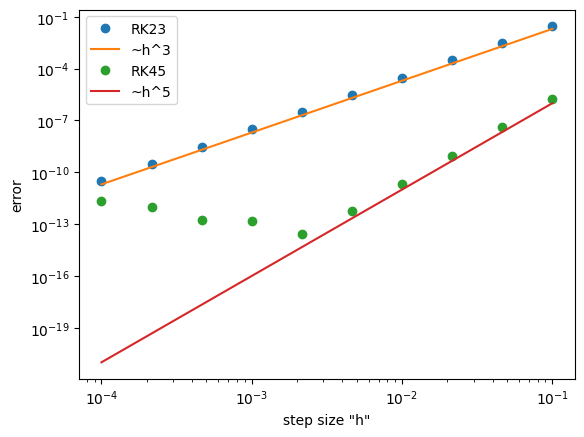

In [11]:
def performance_demo():
    """Demonstrate the obtained error in the solution of an example ODE y'=y
    as function of step size for a 3rd and 5th order solver.
    """

    # Define ODE
    def ODE(t, y):
        return y

    # empty table to store perfomance for 10 values of h
    # the first column contains h
    # the second column error on the result obtained with RK23
    # the third column error on the result obtained with R45
    perf = np.zeros([10, 3])

    steps = np.logspace(-4, -1, num=10)
    # solve ODE
    for i, h in enumerate(steps):
        sol = integrate.solve_ivp(ODE, [0, 5], [1], max_step=h, method="RK23")
        sol2 = integrate.solve_ivp(ODE, [0, 5], [1], max_step=h, method="RK45")
        perf[i] = [
            h,
            np.abs(sol.y[0, -1] - np.exp(5)),
            np.abs(sol2.y[0, -1] - np.exp(5)),
        ]

    # plot results
    plt.close("performance")
    fig, ax = plt.subplots(num="performance")
    ax.plot(perf[:, 0], perf[:, 1], "o", label="RK23")
    ax.plot(perf[:, 0], 20 * perf[:, 0] ** 3.0, label="~h^3")
    ax.plot(perf[:, 0], perf[:, 2], "o", label="RK45")
    ax.plot(perf[:, 0], 0.1 * perf[:, 0] ** 5.0, label="~h^5")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel('step size "h"')
    ax.set_ylabel("error")
    ax.legend()


performance_demo()

> As seen in the figure, the error indeed scales as the step size to the third and fifth power for the third and fifth order solver, respectively.
> Note that, as the solver reaches the machine precision of about $10^{-16}$, it is of no use to further decrease the step size.

---

> **Example**
>
> Secondly, we'll also have a look at the obtained error and number of function evaluations taken as function of a predefined relative error tolerance for 2 adaptive step size solvers.

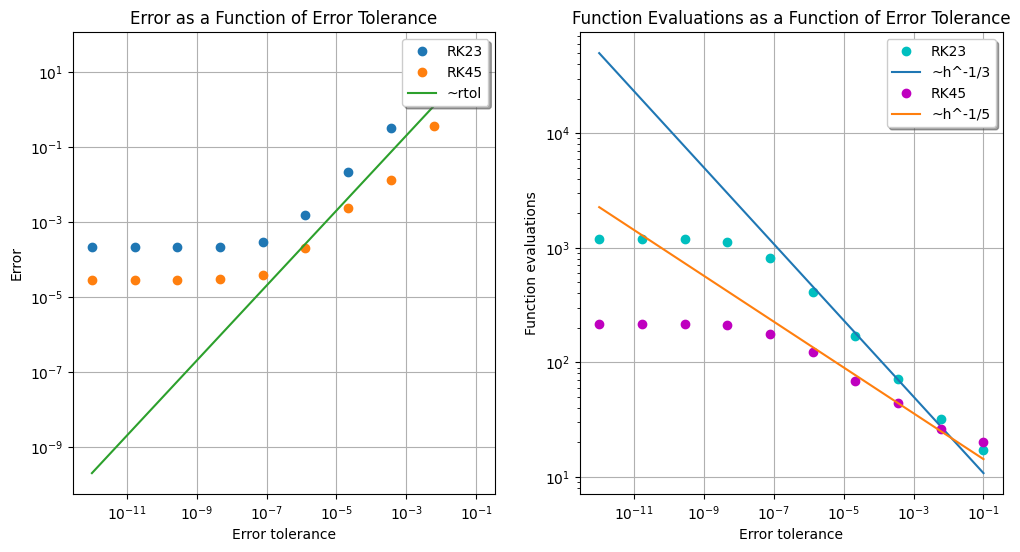

In [12]:
def performance_demo2():
    """Demonstrate the obtained error and number of function evaluations taken
    as function of the used relative error when solving of an example ODE y'=y
    with an adaptive step 3rd and 5th order solver.
    """

    # Define ODE
    def ODE(t, y):
        return y

    # Empty table to store performance for 10 values of the relative error tolerance
    # First column: rtol
    # Second column: error on result obtained with RK23
    # Third column: number of function evaluations taken by RK23
    # Fourth column: error on result obtained with RK45
    # Fifth column: number of function evaluations taken by RK45
    perf = np.zeros([10, 5])

    # Solve ODE
    steps = np.logspace(-12, -1, num=10)
    for i, tol in enumerate(steps):
        sol = integrate.solve_ivp(ODE, [0, 5], [1], rtol=tol, method="RK23")
        sol2 = integrate.solve_ivp(ODE, [0, 5], [1], rtol=tol, method="RK45")
        perf[i] = [
            tol,
            np.abs(sol.y[0, -1] - np.exp(5)),
            sol.nfev,
            np.abs(sol2.y[0, -1] - np.exp(5)),
            sol2.nfev,
        ]

    # Plot results: Error as a function of error tolerance
    plt.close("performance_demo2")
    fig, (ax0, ax1) = plt.subplots(
        1, 2, squeeze=True, figsize=(12, 6), num="performance_demo2"
    )
    ax0.set_xscale("log")
    ax0.set_yscale("log")
    ax0.plot(perf[:, 0], perf[:, 1], "o", label="RK23")
    ax0.plot(perf[:, 0], perf[:, 3], "o", label="RK45")
    ax0.plot(perf[:, 0], 200 * perf[:, 0], label="~rtol")
    ax0.set_xlabel("Error tolerance")
    ax0.set_ylabel("Error")
    ax0.legend(loc="upper right", fancybox=True, shadow=True)
    ax0.set_title("Error as a Function of Error Tolerance")
    ax0.grid(True)

    # Plot results: Number of function evaluations as a function of error tolerance
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.plot(perf[:, 0], perf[:, 2], "o", c="c", label="RK23")
    ax1.plot(perf[:, 0], 5 * perf[:, 0] ** (-1.0 / 3), label="~h^-1/3")
    ax1.plot(perf[:, 0], perf[:, 4], "o", c="m", label="RK45")
    ax1.plot(perf[:, 0], 9 * perf[:, 0] ** (-1.0 / 5), label="~h^-1/5")
    ax1.set_xlabel("Error tolerance")
    ax1.set_ylabel("Function evaluations")
    ax1.legend(loc="upper right", fancybox=True, shadow=True)
    ax1.set_title("Function Evaluations as a Function of Error Tolerance")
    ax1.grid(True)

    plt.show()


performance_demo2()

At first sight, it seems to pay off to implement increasingly complex and higher-order solvers. 
However, for each additional order, a number of extra evaluations per step are necessary, as shown in the table below.

$$
\begin{array}{c|ccccccccc}
    \mathrm{solver}&\mathrm{Euler}& \mathrm{Heun12} & \mathrm{RK3}& \mathrm{Bogacki-Shampine23}& \mathrm{RK4} & \mathrm{Dormand-Prince45}& \mathrm{Fehlberg6}& \mathrm{Fehlberg7} \\ \hline
    \frac{\#\mathrm{evaluations}}{\mathrm{step}}&1&2&3&4&4&6&8&13
\end{array}
$$


There also exists a theoretical limit which order can be achieved by a certain number of evaluations per step.

$$
\begin{array}{c|ccccccccc}
    \mathcal{O}(\mathrm{solver})&1&2&3&4&5&6&7&8 \\ \hline
    \frac{\#\mathrm{evaluations}}{\mathrm{step}}&1&2&3&4&6&7&9&11
\end{array}
$$

Note that the Bogacki-Shampine (when not considering FSAL) and the Fehlberg methods appear to be suboptimal, but this stems from the fact that they also have a lower order solution embedded, which further increases the number of conditions their numbers in the Butcher tableau have to fulfill, and consequently require more variables and thus more evaluations per step.

A second point to take into account is the memory usage of these solvers. The Seventh order Fehlberg method is only slightly faster than the Sixth order Fehlberg  method, but uses 13 evaluations per step, as compared to 8. 
It thus requires almost twice the amount of memory.
Especially in GPU-software, where the memory bandwidth often is a limiting factor, such considerations need to be taken into account.

### Extrapolation methods

**Extrapolation methods** are based on the use of a single-step method to integrate the ODE over a given interval, $t_k \leq t \leq t_{k+1}$ , using several different step sizes $h_i$ and yielding results denoted by $\mathbf{Y}(h_i)$.
This gives a discrete approximation to a function $Y(h)$, where $\mathbf{Y}(0) = \mathbf{y}(t_{k+1})$. 

An interpolating polynomial or rational function $\hat{\mathbf{Y}}(h)$ is fit to these data, and $\hat{\mathbf{Y}}(0)$ is then taken as the approximation to $\mathbf{Y}(0)$. 

We saw an example of this approach in **Richardson extrapolation** for numerical differentiation and integration.

Extrapolation methods are capable of achieving very high accuracy, but they tend to be much less efficient and less flexible than other methods for ODEs, so they are used mainly when extremely high accuracy is required and cost is not a significant factor.

### Multistep methods

Whereas Runge-Kutta methods only use information of one previous point (i.e. a single step method), **Multistep methods** use information at more than one previous point to estimate the solution at the next point.

One of the most popular *explicit* multistep methods is the fourth-order **Adams-Bashforth** method, which uses information of 3 previous time steps, next to the current one:

$$
\mathbf{y}_{k+1}= \mathbf{y}_{k}+\frac{h}{24}\left(55\mathbf{y}'_{k}-59\mathbf{y}'_{k-1}+37\mathbf{y}'_{k-2}-9\mathbf{y}'_{k-3} \right)
$$

> **Derivation**
>
> This derivation considers a scalar function $y$, but the results can be applied componentwise to nonscalar functions as well.
>
> We derive a multistep method of the form
>
> $$\mathbf{y}_{k+1}= \alpha \mathbf{y}_{k}+h(\beta_0\mathbf{y}'_{k}+\beta_1\mathbf{y}'_{k-1}+\beta_2\mathbf{y}'_{k-2}+\beta_3\mathbf{y}'_{k-3})$$
>
> To determine the 5 coefficients $\alpha, \beta_0, \beta_1, \beta_2$ and $\beta_3,$ we require that this formula exactly integrates the first 5 monomials $1,t,t^2,t^3$ and $t^4$.
>
> $$
\begin{split}
1&=\alpha+h(\beta_0\cdot 0+\beta_1\cdot 0+\beta_2\cdot 0+\beta_3\cdot 0) \\
t_{k+1}&=\alpha t_k+h(\beta_0\cdot 1+\beta_1\cdot 1+\beta_2\cdot 1+\beta_3\cdot 1) \\
t_{k+1}^2&=\alpha t_k^2+h(\beta_0 2t_{k}+\beta_1 2t_{k-1}+\beta_2 2t_{k-2}+\beta_3 2t_{k-3}) \\
t_{k+1}^3&=\alpha t_k^3+h(\beta_0 3t^2_{k}+\beta_1 3t^2_{k-1}+\beta_2 3t^2_{k-2}+\beta_3 3t^2_{k-3}) \\
t_{k+1}^4&=\alpha t_k^4+h(\beta_0 4t^3_{k}+\beta_1 4t^3_{k-1}+\beta_2 4t^3_{k-2}+\beta_3 4t^3_{k-3})
\end{split}
$$
>
> Because this method needs to work for *any* value of $t_k$ and $h$, we can conventiently choosing $t_k=0$ and $h=1$. 
>
> It then follows that $t_{k+1}=1$, $t_{k-1}=-1$, $t_{k-2}=-2$ and , $t_{k-3}=-3$
>
> The first equation in the system thus becomes 
>
> $$1=\alpha\cdot1+h(0)$$
>
> From which it follows that $\alpha=1$. The remaining system of equations thus reduces to
>
> $$
\begin{split}
1&=\beta_0 +\beta_1+\beta_2+\beta_3 \\
1&=-2\beta_1 -4\beta_2-6\beta_3 \\
1&=3\beta_1 +12\beta_2+27\beta_3 \\
1&=1-4\beta_1 -32\beta_2-108\beta_3 \\
\end{split}
$$
>
> Which we can solve using `linalg.solve` (as seen in the linear systems notebook) to find the coefficients of the Adams-Bashforth method.

In [13]:
def solve_adams_bashforth():
    """Solve the linear system encountered in the derivation of
    the Adams-Bashforth method.

    It's solution returns the coefficients of said method.
    """
    A = np.array([[1, 1, 1, 1], [0, -2, -4, -6], [0, 3, 12, 27], [0, -4, -32, -108]])
    b = np.array([1, 1, 1, 1])
    x = linalg.solve(A, b)

    with np.printoptions(
        formatter={"all": lambda x: str(fractions.Fraction(x).limit_denominator())}
    ):
        print(x)


solve_adams_bashforth()

[55/24 -59/24 37/24 -3/8]


One of the most popular *implicit* multistep methods is the fourth-order **Adams-Moulton** method, which uses information of 2 previous time steps, next to the current one *and the next one*:

$$
\mathbf{y}_{k+1}= \mathbf{y}_{k}+\frac{h}{24}\left(9\mathbf{y}'_{k+1}+19\mathbf{y}'_{k}-5\mathbf{y}'_{k-1}+\mathbf{y}'_{k-2} \right)
$$

> **Exercise**
>
> A very similar derivation can be written down to find the coefficients of the Adams-Moulton method, which is left as an exercise.

Just like for single-step methods, implicit multistep methods are usually more accurate and stable than explicit multistep methods, but they require an initial guess to solve the resulting (usually nonlinear) equation for $\mathbf{y}_{k+1}$.
A good initial guess is conveniently supplied by an explicit method, so the explicit and implicit methods can be used as a **predictor-corrector pair**. 
One of the most used pairs is the Adams-Bashforth predictor and Adams-Moulton corrector shown above.

One could use the corrector repeatedly (i.e., fixed-point iteration) until some convergence tolerance is met, but doing so may not be worth the expense. 
Instead, typically, a fixed number of corrector steps, often only one, is, giving a **PECE (predict, evaluate, correct, evaluate)** scheme.
Although it has no effect on the value of $\mathbf{y}_{k+1}$ , the second evaluation of $\mathbf{f}$ in a PECE scheme yields an improved value of $\mathbf{y}'_{k+1}$ for use in later steps.

**A few properties of multistep methods worth knowing**
- Since multistep methods require several previous solution values and derivative values, how do we get started initially, before we have any past history to use? 
One strategy is to use a single-step method, which requires no past history, to generate solution values at enough points to begin using a multistep method.
- Changing step size is complicated, since the interpolation formulas are most conveniently based on equally spaced intervals for several consecutive points, so multistep methods are not idealy suited for adaptive step sizes.
- A good local error estimate can be determined from the difference between the predictor and the corrector.
- Implicit methods have a much greater region of stability than explicit methods but must be iterated to convergence to realize this benefit fully (e.g., a PECE scheme is actually explicit, albeit in a somewhat complicated way).
-  A properly designed implicit multistep method can be very effective for solving
stiff equations.

### Multivalue methods

Changing step size is difficult with multistep methods because the past history of the solution is most easily maintained at equally spaced intervals. 
Similar to multistep methods, **multivalue** methods are based on polynomial interpolation, but they avoid many of the implementation difficulties associated with multistep methods.

The main idea motivating multivalue methods is the observation that the interpolating polynomial itself can be evaluated at any point, not just at equally spaced intervals. 
The equal spacing associated with multistep methods is simply an artifact of the way the methods are represented as a linear combination of successive solution and derivative values with fixed weights.

Multivalue methods are therefore a direct extension of multistep methods which allow adaptive step sizes (at the cost of more function evaluations per step and a more complicated implementation).

### Methods to solve ODE's with `scipy`

All documentation on solving initial value problems for ODE's in `scipy` can be found here:

<https://docs.scipy.org/doc/scipy/tutorial/integrate.html#ordinary-differential-equations-solve-ivp>

The main functions you can use are `integrate.solve_ivp` and `integrate.odeint`.

Be aware that the latter has a different (and older) API than the former, but are still commonly used.

> They wrap older solvers implemented in Fortran (mostly ODEPACK). 
> While the interface to them is not particularly convenient and certain features are missing compared to the new API, the solvers themselves are of good quality and work fast as compiled Fortran code. 
> In some cases, it might be worth using this old API.

The application of the LSODA vs RK45 methods to a stiff problem is illustrated in the example below.

In [14]:
def demo_scipy():
    def func(t, y):
        return -100 * y + 100 * t + 101

    y0 = np.array([10.99])
    solution = integrate.solve_ivp(
        func,
        [0, 5],
        y0,
        t_eval=np.arange(0, 5.1, 0.1),
        method="RK45",
        atol=1.49012e-8,
        rtol=1.49012e-8,
    )
    print("RK45\n", solution.nfev, "\n", solution.y)

    solution = integrate.solve_ivp(
        func,
        [0, 5],
        y0,
        t_eval=np.arange(0, 5.1, 0.1),
        method="LSODA",
        atol=1.49012e-8,
        rtol=1.49012e-8,
    )
    print("LSODA\n", solution.nfev, "\n", solution.y)

    def func(y, t):
        return -100 * y + 100 * t + 101

    sol = integrate.odeint(func, y0, np.arange(0, 5.1, 0.1), full_output=False)
    print("ODEINT (also LSODA)\n", sol.transpose())


demo_scipy()

RK45
 1394 
 [[10.99        1.10045355  1.20000002  1.30000002  1.40000002  1.50000002
   1.60000003  1.70000002  1.80000004  1.90000002  2.00000005  2.10000001
   2.20000005  2.30000001  2.40000003  2.50000002  2.60000001  2.70000004
   2.79999999  2.89999999  3.00000001  3.10000002  3.19999998  3.29999999
   3.4         3.49999999  3.59999999  3.70000001  3.79999998  3.89999999
   3.99999999  4.09999995  4.19999997  4.29999998  4.39999998  4.49999995
   4.59999999  4.69999993  4.79999999  4.89999998  4.99999995  5.09999998
   5.19999999  5.29999998  5.39999996  5.5         5.59999997  5.69999999
   5.8         5.89999998  6.00000001]]
LSODA
 238 
 [[10.99        1.10045354  1.20000002  1.3         1.4         1.5
   1.6         1.7         1.8         1.9         2.          2.1
   2.2         2.3         2.4         2.5         2.6         2.7
   2.8         2.9         3.          3.1         3.2         3.3
   3.4         3.5         3.6         3.7         3.8         3.9
   4.  

Note that LSODA is much more accurate, while RK45 makes much more function evaluations.

## Boundary Value Problems (BVP's) for ODE's

### Introduction

By itself, a differential equation does not uniquely determine a solution; additional side conditions must be imposed on the solution to make it unique. 

These side conditions prescribe values that the solution or its derivatives must have at some specified point or points. 
If all of the side conditions are specified at the same point, say $t_0$ , then we have an initial value problem, which we considered until now.

If the side conditions are specified at more than one point, then we have a **boundary value problem, or BVP**.

For an ordinary differential equation, the side conditions are typically specified at two points, namely the endpoints of some interval $[a, b]$, which is why the side conditions are called boundary conditions or boundary values. 

The remainder of this notebook will introduce a numerical method for solving such **two-point boundary value problems**.

> **Examples**
>
> Newton’s Second Law of Motion, $F = ma$, which is a second-order ODE, involves two constants of integration, and hence two side conditions must be specified in order to determine a unique solution over the interval
of integration, say $[a, b]$.
>
> In an initial value problem, both the position $y(a)$ and velocity $y'(a)$ would be specified at the initial point $a$, and this would uniquely determine the solution $y(t)$ over the entire interval.
>
> Other side conditions could be specified, however, such as the initial position $y(a)$ and final position $y(b)$, or the initial position $y(a)$ and final velocity $y'(b)$. 
> Indeed, any linear (or even nonlinear) combination of solution and derivative values at the endpoints could be specified, each giving a different two-point boundary value problem for this ODE.


> Our primary focus will be on second-order scalar BVPs (and equivalent first-order systems) of exactly this type because many important physical problems have this form, including
> 
> - The bending of an elastic beam under a distributed transverse load
> - The distribution of electrical potential between two flat electrodes
> - The temperature distribution in an internally heated homogeneous wall whose surfaces are maintained at fixed temperatures
> - The steady-state concentration of a pollutant in porous soil

The two-point boundary value problem for the second-order scalar ODE

$$u''=f(t,u,u')$$

with $a<t<b$

and boundary conditions:

- $u(a)=\alpha$
- $u(b)=\beta$

is equivalent to the first order system of ODEs:

$$
\begin{bmatrix}y'_1 \\
y'_2\end{bmatrix}=\begin{bmatrix}
y_2 \\
f(t,(y1,y2)
\end{bmatrix}
$$

with $a<t<b$

and with separated boundary conditions
 
$$
\begin{bmatrix}
 1 & 0 \\
 0 & 0
\end{bmatrix}
\begin{bmatrix}
 y_1(a) \\
 y_2(a)
\end{bmatrix}+
\begin{bmatrix}
 0 & 0 \\
 1 & 0
\end{bmatrix}
\begin{bmatrix}
 y_1(b) \\
 y_2(b) \end{bmatrix}=
\begin{bmatrix}
 \alpha \\
 \beta
\end{bmatrix}
$$

For the general first-order two-point boundary value problem

$$
\mathbf{y}'=\mathbf{f}(t,\mathbf{y})
$$

with $a<t<b$ and boundary conditions

$$
\mathbf{g}(\mathbf{y}(a),\mathbf{y}(b))=\mathbf{0}
$$

let $\mathbf{y}(t; \mathbf{x})$ denote the solution to the associated initial value problem with initial condition $\mathbf{y}(a) = x$.
For a given $\mathbf{x}$, the solution $\mathbf{y}(t; \mathbf{x})$ of the IVP is a solution of the BVP if

$$
\mathbf{h}(\mathbf{x}) \equiv \mathbf{g}(\mathbf{x}, \mathbf{y}(b;\mathbf{x}))=\mathbf{0}
$$

### Shooting method

The **shooting method** replaces a given boundary value problem by a sequence of initial value problems.

As indicate above, the general first-order two-point boundary value problem is equivalent to the system of nonlinear algebraic equations

$$\mathbf{h}(\mathbf{x}) \equiv \mathbf{g}(\mathbf{x},\mathbf{y}(b;\mathbf{x}))=\mathbf{0}$$

One way to solve the BVP, therefore, is to solve the nonlinear system $\mathbf{h}(\mathbf{x}) = \mathbf{0}$ using any suitable method from the nonlinear systems notebook.

Evaluation of $\mathbf{h}(\mathbf{x})$ for any given value $\mathbf{x}$ will require solving an IVP to determine $\mathbf{y(b}; \mathbf{x})$, for which we can use any suitable method seen in this notebook.

To make this approach more concrete, consider the two-point BVP for a scalar second-order ODE 

$$u''=f(t,u,u')$$

with $a<t<b$ and boundary conditions:

- $u(a)=\alpha$
- $u(b)=\beta$

where we are given the initial value $u(a)$ and final value $u(b)$ of the solution, but not the initial slope $u'(a)$.
If we knew the latter, then we would have an IVP. 
We lack that information, but we can guess a value for the initial slope, solve the resulting IVP, and then check to see if the computed solution value at $t = b$ matches the desired boundary value, $u(b) = \beta$.

The basic idea is illustrated in the figure below.

Each curve represents a solution of the same second-order ODE, with different values for the initial slope $u'(a)$ giving different solutions for the ODE. 
All of the solutions start with the given initial value $u(a) = \alpha$, but for only one value of the initial slope does the resulting solution curve hit the desired boundary condition $u(b) = \beta$.
The motivation for the name **shooting method** should now be obvious: we keep adjusting our aim until we hit the target.

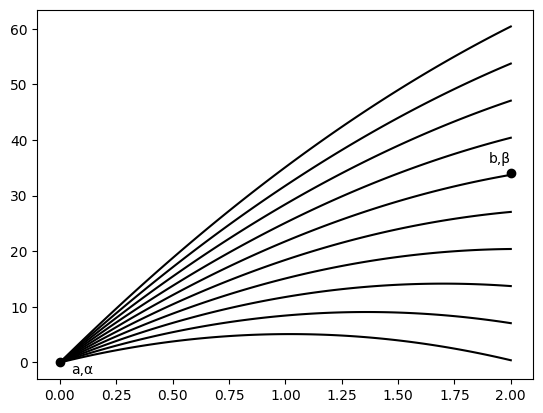

In [15]:
def demo_shooting_method():
    """Visually illustrate the shooting method.

    ODE y''=-g

    or  y'=v
        v'=-g

    """

    def func(t, y):
        """Compute derivatives of y.

        Parameters
        ----------
        t
            time
        y
            Array with [position, velocity]

        Returns
        -------
        yprime
            Array with [velocity, accelaration]
        """
        return np.array([y[1], -9.8])

    y0 = 0
    solutions = np.zeros([10, 100])
    guesses = np.linspace(10, 40, 10)

    plt.close("shooting")
    fig, ax = plt.subplots(num="shooting")
    for i, v0 in enumerate(guesses):
        sol = integrate.solve_ivp(
            func, [0, 2], [y0, v0], t_eval=np.linspace(0, 2, 100)
        )
        solutions[i] = sol.y[0]
        ax.plot(sol.t, solutions[i, :], c="k")

    ax.plot(0, 0, "o", c="k")
    ax.annotate("a,α", (0.05, -2))
    ax.plot(2, 34, "o", c="k")
    ax.annotate("b,β", (1.9, 36))


demo_shooting_method()

After transforming a general second-order BVP into a first-order system, the boundary conditions become

$$
\mathbf{g}(\mathbf{y}(a),\mathbf{y}(b))=
\begin{bmatrix}
  y_1(a)-\alpha \\
  y_1(b)-\beta
\end{bmatrix}=\mathbf{0}
$$

Thus, the nonlinear system to be solved is

$$
\mathbf{h}(\mathbf{x})=
\begin{bmatrix}
 y_1(a;\mathbf{x})-\alpha \\
 y_1(b;\mathbf{x})-\beta
\end{bmatrix}=\mathbf{0}
$$

where x is the initial value. 
The first component of $\mathbf{h}(\mathbf{x})$ will be zero if $x_1 = \alpha$, and the initial slope $x_2$ remains to be determined so that the second component of $\mathbf{h}(\mathbf{x})$ will be zero. 

In effect, therefore, we must solve the scalar nonlinear equation in $x_2$ ,

$$
h_2(\alpha, x_2) = y_1 (b; \alpha, x_2) = 0
$$

for which we can use a one-dimensional zero finder seen in the nonlinear systems notebook.

> **Example**
>
> We illustrate the shooting method on the two-point BVP for the second-order scalar ODE which describes the vertical trajectory of a bullet (neglecting air friction).
>
> We shoot the bullet in the air at time and position equal to zero, and find that it takes 40 seconds for the bullet to fall down again.
> 
>
> $$y''=-g$$
>
> with boundary conditions $y(0)=0$ and $y(40)=0$
>
> For each guess for $y'(0)$, we will integrate the ODE using the Dormand-Prince method (the default for `integrate.solve_ivp` to determine how close we come to hitting the desired solution value at $t = 40$. 
>
> Before doing so, however, we must first transform the second-order ODE into a system of two first-order ODEs
>
> $$
\begin{bmatrix}
 y' \\
 v'
\end{bmatrix}=
\begin{bmatrix}
 v \\
 -g
\end{bmatrix}
$$
>
> and write a function which gives us the resulting position at $t=40$ for an initial guess $v(0)$.
>
> and try  an initial velocity of $v(0)=100$ m/s.

In [16]:
def guess(v0):
    """Helper function to integrate the differential equation y''=-g
    from t=0 to t=40, given an initial value v0.
    """

    def func(t, y):
        return np.array([y[1], -9.8])

    # Fix the initial state, even when given as array,
    # for compatibility with root finder.
    y0 = 0
    v0 = np.ravel([v0])[0]
    return integrate.solve_ivp(func, [0, 40], [y0, v0], t_eval=[40]).y[0][0]


guess(100)

np.float64(-3839.9999999999955)

> This has now become a root finding problem, which we can solve using `optimize.root`, with the initial guess of $v(0)=100$.

In [17]:
optimize.root(guess, 100)

 message: The solution converged.
 success: True
  status: 1
     fun: -5.684341886080801e-13
       x: [ 1.960e+02]
  method: hybr
    nfev: 11
    fjac: [[-1.000e+00]]
       r: [-8.739e+01]
     qtf: [ 5.684e-13]

> Resulting in the solution $v(0)=196$ m/s.

---

> We also could have solved this problem immediately using `integrate.solve_bvp`

v(0)=  196.00000000000003


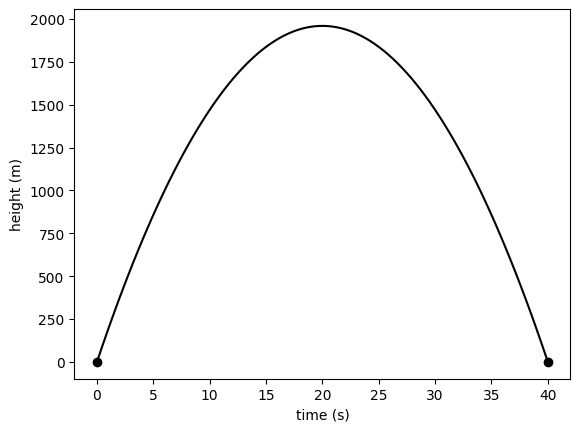

In [18]:
def demo_bvp():
    """Illustrate integrate.solve_bvp to solve the boundary value problem
    y''=-g with y(0)=y(40)=0 as boundary values.
    """

    def func(t, y):
        return np.array([y[1], -9.8 * np.ones(len(y[0]))])

    def bc(ya, yb):
        return np.array([ya[0], yb[0]])

    x = np.linspace(0, 40, 100)
    y = np.ones((2, 100))

    sol = integrate.solve_bvp(func, bc, x, y)

    print("v(0)= ", sol.y[1, 0])
    plt.close("bvp")
    fig, ax = plt.subplots(num="bvp")
    ax.plot(sol.x, sol.y[0], c="k")
    ax.plot(0, 0, "o", c="k")
    ax.plot(40, 0, "o", c="k")
    ax.set_xlabel("time (s)")
    ax.set_ylabel("height (m)")


demo_bvp()

The shooting method is conceptually simple and is easy to implement using existing software for initial value problems and for nonlinear equations. 
It has serious drawbacks, however. 

Chief among these is that the shooting method inherits the stability (or instability) of the associated IVP, which as we have seen may be unstable even when the BVP is stable. 
This potential ill-conditioning of the IVP may make it extremely difficult to achieve convergence of the iterative method for the nonlinear equation. 
Moreover, for some values of the starting guess for the initial value, the solution of the IVP may not exist over the entire interval of integration in that the solution may become unbounded before reaching the right-hand endpoint of the BVP.

A potential remedy for the difficulties associated with simple shooting is provided by **multiple shooting**, in which the interval of integration $[a, b]$ is divided into subintervals and shooting is carried out on each subinterval separately. 

Requiring continuity at the internal mesh points provides boundary conditions for the individual subproblems. Restricting the length of its interval of integration improves the conditioning of each IVP, but it also results in a larger system of nonlinear equations to solve.
Specifically, the new system of ODEs is of size $mn$, where $m$ is the number of subintervals and $n$ is the size of the original system.

Multiple shooting requires starting guesses for the initial values and slopes at the mesh points, and it also requires some new choices, such as the number of subintervals to use. 
Although it is more robust than simple shooting, multiple shooting is hardly foolproof and must be used with considerable care.